In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import squarify
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from wordcloud import WordCloud

In [96]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [97]:
df = pd.DataFrame(data=dataset)

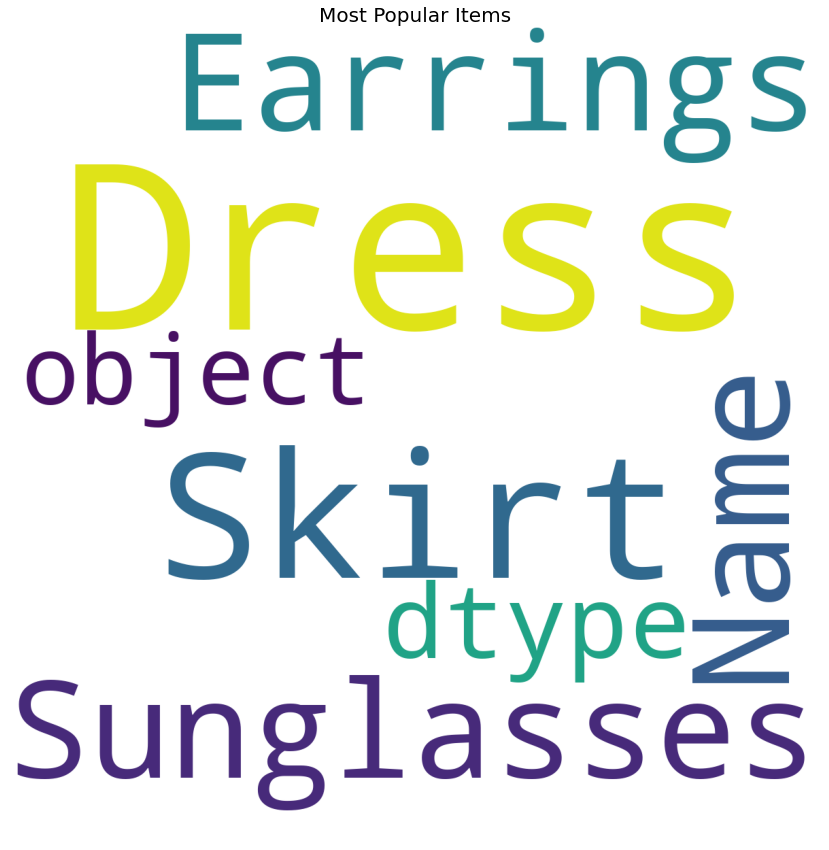

In [98]:
plt.rcParams['figure.figsize'] = (15, 15)

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(y.i)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

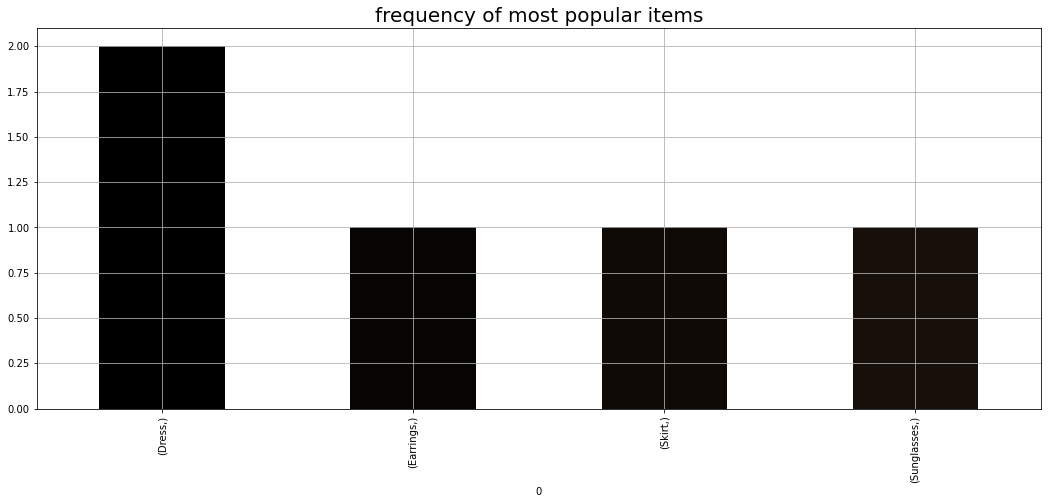

In [99]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
pd.DataFrame(df[0]).value_counts().plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [113]:
y = (df[0]).value_counts().to_frame()
y.index


Index(['Dress', 'Skirt', 'Sunglasses', 'Earrings'], dtype='object')

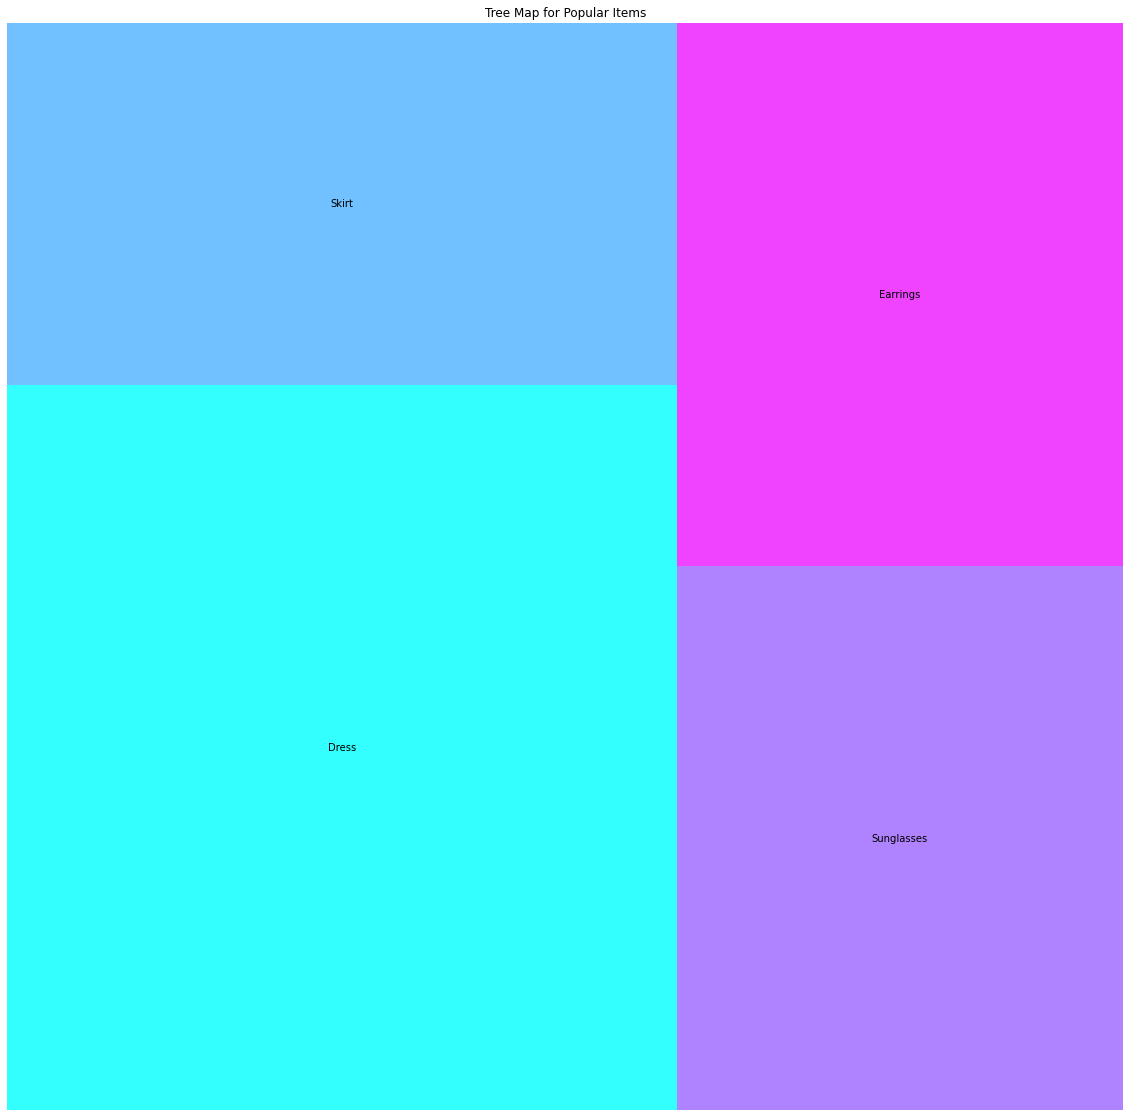

In [115]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 15, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [102]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
datasetaset=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
dataset=pd.DataFrame(te_ary, columns=te.columns_) 

from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(dataset, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Skirt, Pants)"


In [103]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [104]:
data=pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [105]:
data.shape

(7501, 20)

In [106]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


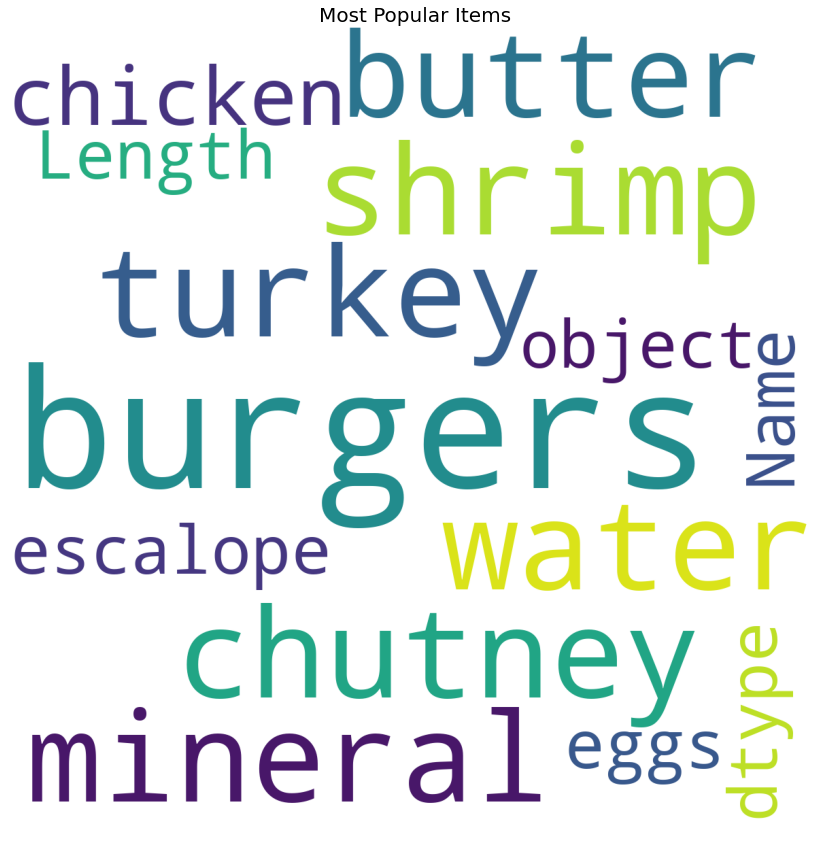

In [109]:
plt.rcParams['figure.figsize'] = (15, 15)

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

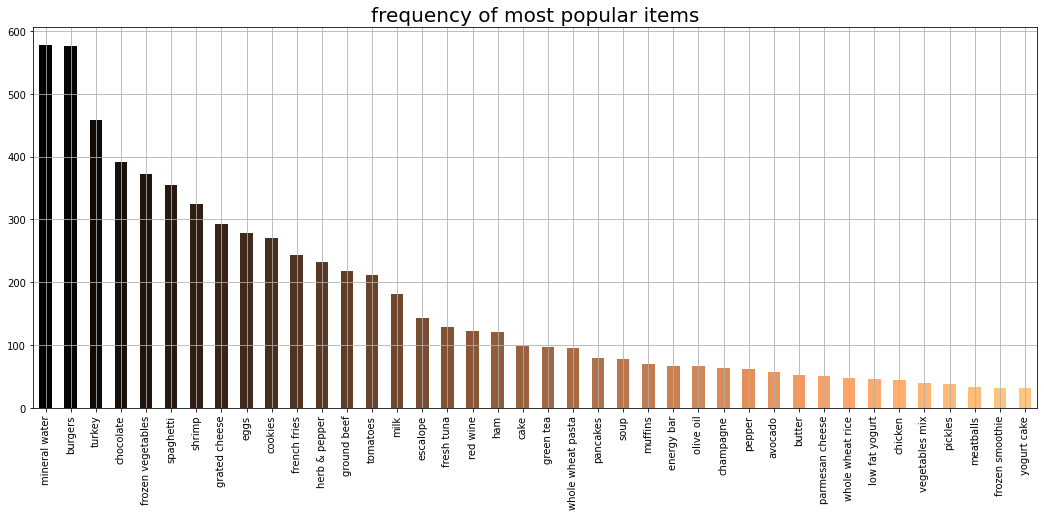

In [110]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [111]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'strawberries', 'yams', 'oil', 'tomato sauce'],
      dtype='object')

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


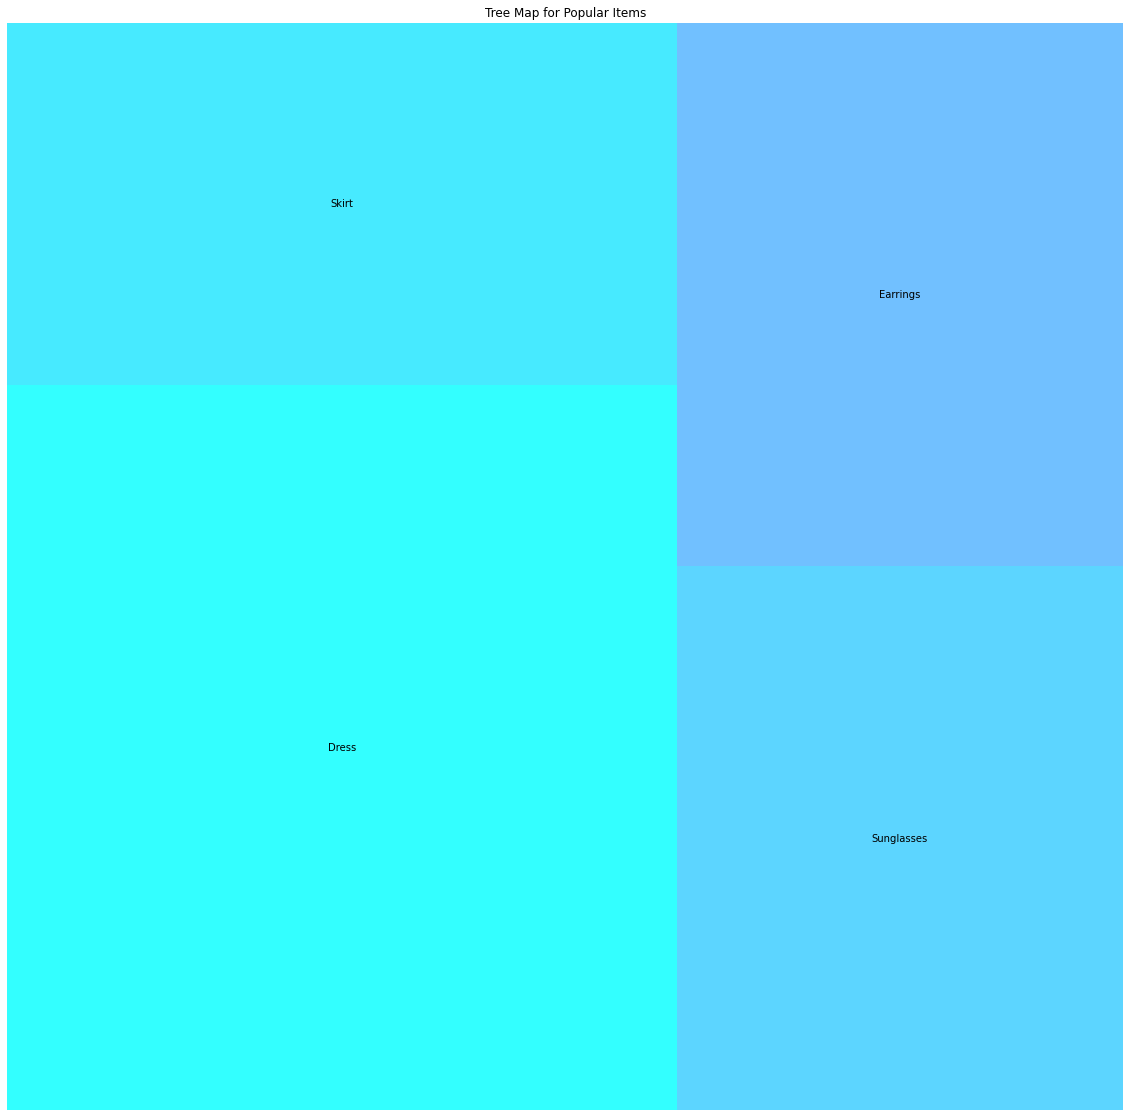

In [119]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 5, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [50]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [22]:
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [53]:
#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
510,0.011065,"(mineral water, nan, milk, ground beef)"
511,0.017064,"(mineral water, nan, spaghetti, ground beef)"
512,0.015731,"(mineral water, nan, milk, spaghetti)"
513,0.010265,"(mineral water, olive oil, nan, spaghetti)"


In [25]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [28]:
#getting th item sets with length = 1 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [33]:
# getting the item sets with length = 2 and support more han 10% 
frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
26,0.087188,"(nan, burgers)",2
27,0.081056,"(cake, nan)",2
28,0.059992,"(nan, chicken)",2
29,0.052660,"(mineral water, chocolate)",2
30,0.163845,"(nan, chocolate)",2
31,0.080389,"(nan, cookies)",2
32,0.051060,"(nan, cooking oil)",2
33,0.050927,"(eggs, mineral water)",2
34,0.179709,"(eggs, nan)",2
35,0.079323,"(nan, escalope)",2


In [34]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
33,0.050927,"(eggs, mineral water)",2


In [35]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
16,0.238368,(mineral water),1


In [36]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'milk'} ]

,support,itemsets,length
15,0.129583,(milk),1


In [37]:

frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'} ]

,support,itemsets,length
2,0.059992,(chicken),1


In [38]:

frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'} ]

,support,itemsets,length
10,0.095321,(frozen vegetables),1


In [39]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'} ]

,support,itemsets,length
3,0.163845,(chocolate),1


In [40]:

frequent_itemsets[ frequent_itemsets['itemsets'] == { 'chicken'} ]

,support,itemsets,length
2,0.059992,(chicken),1


In [57]:
from mlxtend.frequent_patterns import association_rules 
s = association_rules(frequent_itemsets,metric="confidence")
s.tail()

(nan)    257
Name: consequents, dtype: int64